#  <span style='color:midnightblue'>  Clustering Crime in the USA


Because there isn’t an independent variable, this is an **unsupervised method**, which implies that it seeks to find relationships between then observations without being trained by a response variable.

##  <span style='color:royalblue'>  1. Load required libraries </span>

In [3]:
library(tidyverse)
library(cluster)
library(factoextra)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


##  <span style='color:royalblue'>  2. Load dataset </span>

The dataset USArrests contains statistics in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973.

In [5]:
df <- USArrests

##  <span style='color:royalblue'>  3. Data preparation </span>

In [6]:
#Remove missing values
df <- na.omit(df)

In [7]:
#Scaling/standardizing the data for the algorithm not to depend on variable units
df <- scale(df)

##  <span style='color:royalblue'>  4. Data visualization </span>
This dataset only contains numerical variables which somehow facilitate the clustering process as the dissimilarities between observations are calculated with distance measures.

In [8]:
head(df,10)

,Murder,Assault,UrbanPop,Rape
Alabama,1.24256408,0.7828393,-0.5209066,-0.003416473
Alaska,0.50786248,1.1068225,-1.2117642,2.484202941
Arizona,0.07163341,1.4788032,0.9989801,1.042878388
Arkansas,0.23234938,0.2308680,-1.0735927,-0.184916602
California,0.27826823,1.2628144,1.7589234,2.067820292
Colorado,0.02571456,0.3988593,0.8608085,1.864967207
Connecticut,-1.03041900,-0.7290821,0.7917228,-1.081740768
Delaware,-0.43347395,0.8068381,0.4462940,-0.579946294
Florida,1.74767144,1.9707777,0.9989801,1.138966691
Georgia,2.20685994,0.4828549,-0.3827351,0.487701523


##  <span style='color:royalblue'>  5. Distance measures </span>
The classification of observations into groups requires some methods for computing the distance or the dissimilarity between each pair of observations. The result of this computation is known as a dissimilarity or distance matrix. Some of the methods for calculating distances are the following:
- Euchlidean distance
- Manhattan distances
- Pearson correlation distance
- Spearman correlation distance:
- Kendall correlation distance:

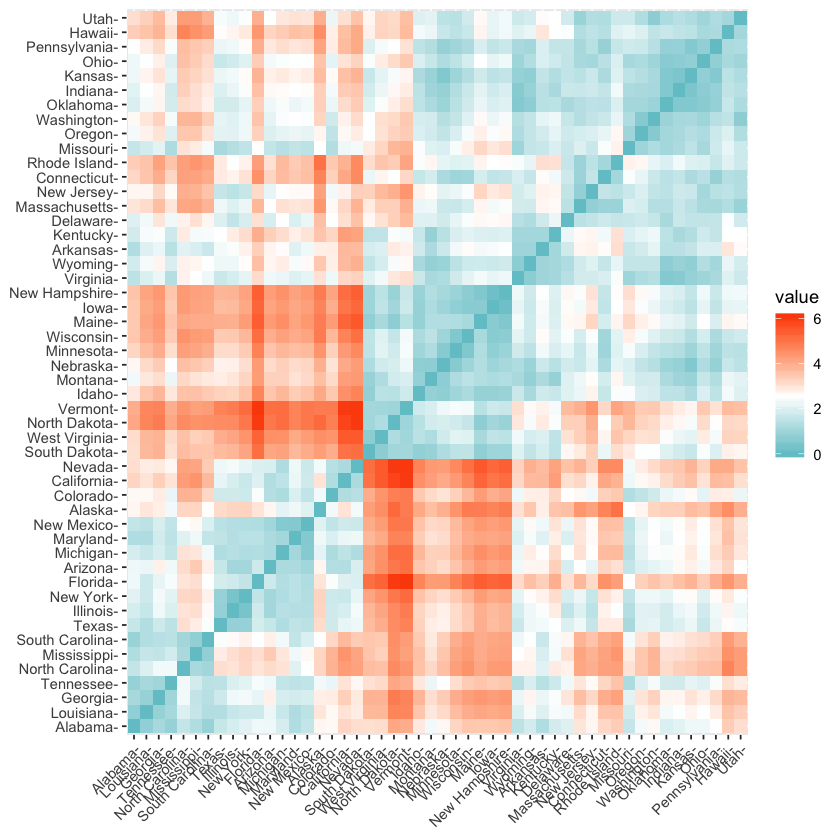

In [10]:
distance <- get_dist(df)
fviz_dist(distance, gradient = list(low = "#00AFBB", mid = "white", high = "#FC4E07"))

**RESULT:**  large dissimilarities (orange) vs large similarities (blue). 

##  <span style='color:royalblue'>  6. K-means clustering
K-means clustering is the most commonly used unsupervised machine learning algorithm for partitioning a given data set into a set of k groups (i.e. k clusters), where k represents the number of groups pre-specified by the analyst. 

It classifies objects in multiple groups (i.e., clusters), such that objects within the same cluster are as similar as possible (i.e., high intra-class similarity), whereas objects from different clusters are as dissimilar as possible (i.e., low inter-class similarity). 
    
In k-means clustering, each cluster is represented by its center (i.e, centroid) which corresponds to the mean of points assigned to the cluster.

In [11]:
#Number of clusters: 2
#Number of parameter configurations (reports the best one): 25
k2 <- kmeans(df, centers = 2, nstart = 25) 
str(k2)

List of 9
 $ cluster     : Named int [1:50] 1 1 1 2 1 1 2 2 1 1 ...
  ..- attr(*, "names")= chr [1:50] "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ centers     : num [1:2, 1:4] 1.005 -0.67 1.014 -0.676 0.198 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:4] "Murder" "Assault" "UrbanPop" "Rape"
 $ totss       : num 196
 $ withinss    : num [1:2] 46.7 56.1
 $ tot.withinss: num 103
 $ betweenss   : num 93.1
 $ size        : int [1:2] 20 30
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


In [12]:
#Clustering results
k2

K-means clustering with 2 clusters of sizes 20, 30

Cluster means:
     Murder    Assault   UrbanPop       Rape
1  1.004934  1.0138274  0.1975853  0.8469650
2 -0.669956 -0.6758849 -0.1317235 -0.5646433

Clustering vector:
       Alabama         Alaska        Arizona       Arkansas     California 
             1              1              1              2              1 
      Colorado    Connecticut       Delaware        Florida        Georgia 
             1              2              2              1              1 
        Hawaii          Idaho       Illinois        Indiana           Iowa 
             2              2              1              2              2 
        Kansas       Kentucky      Louisiana          Maine       Maryland 
             2              2              1              2              1 
 Massachusetts       Michigan      Minnesota    Mississippi       Missouri 
             2              1              2              1              1 
       Montana    

##  <span style='color:royalblue'>  7. Cluster visualization

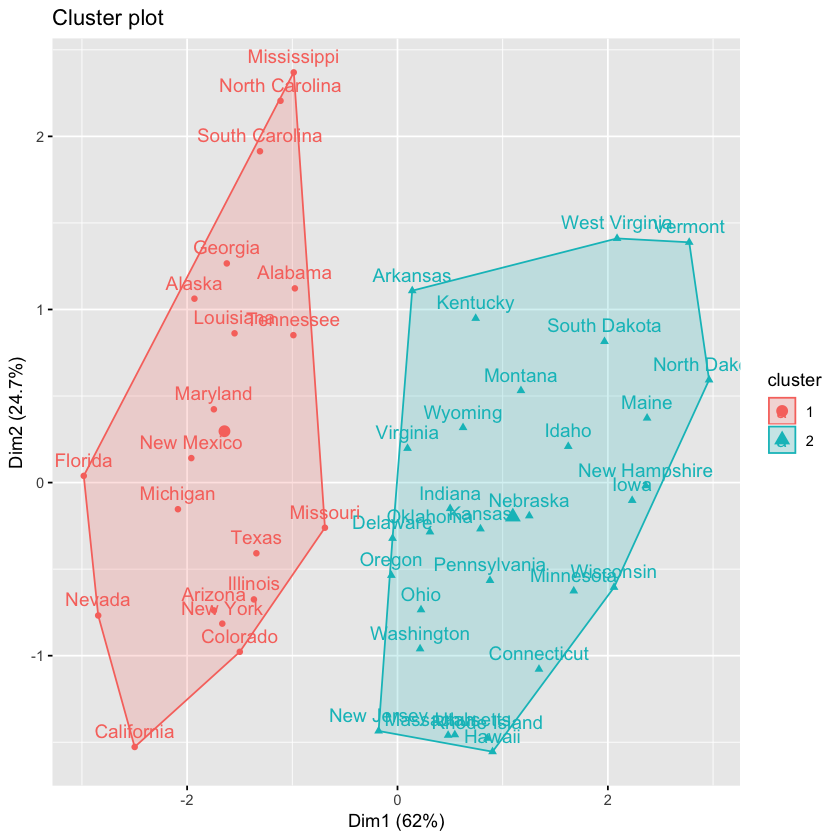

In [13]:
fviz_cluster(k2, data = df)

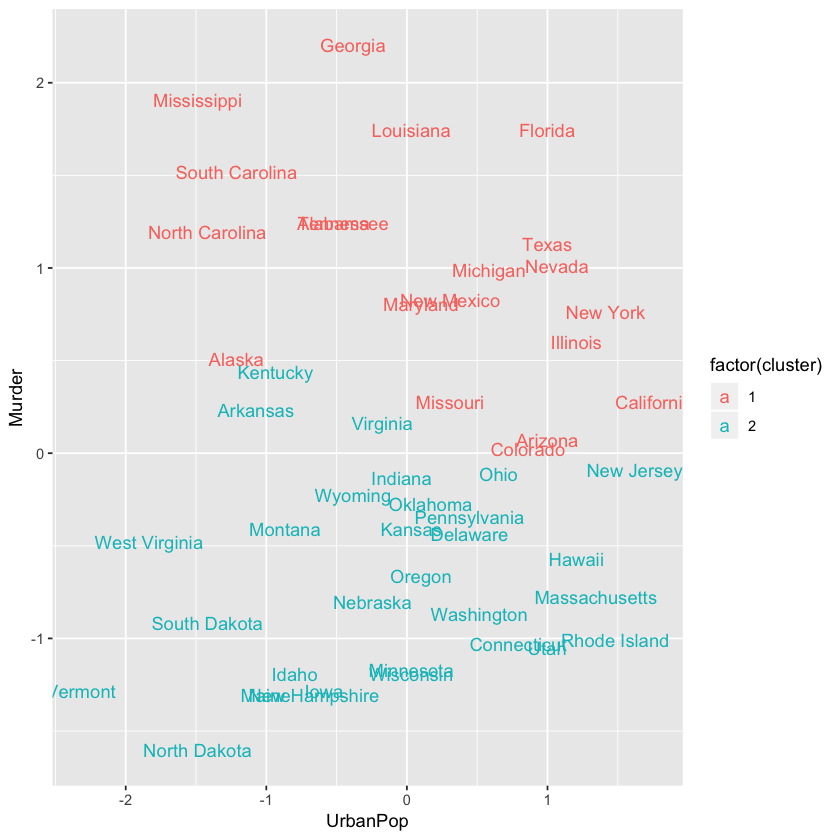

In [14]:
df %>%
  as_tibble() %>%
  mutate(cluster = k2$cluster,
         state = row.names(USArrests)) %>%
  ggplot(aes(UrbanPop, Murder, color = factor(cluster), label = state)) +
  geom_text()

##  <span style='color:royalblue'>  8. Determining Optimal Clusters

###  <span style='color:royalblue'>  8.1. Elbow method
This method iterates the data through a determined number of clusters -k-. For each k, the total within-cluster sum of square (wss) is calculated. There comes a point where adding a new cluster has a marginal effect in reducing the wss.
    
In this example the optimal number of clusters is 4.

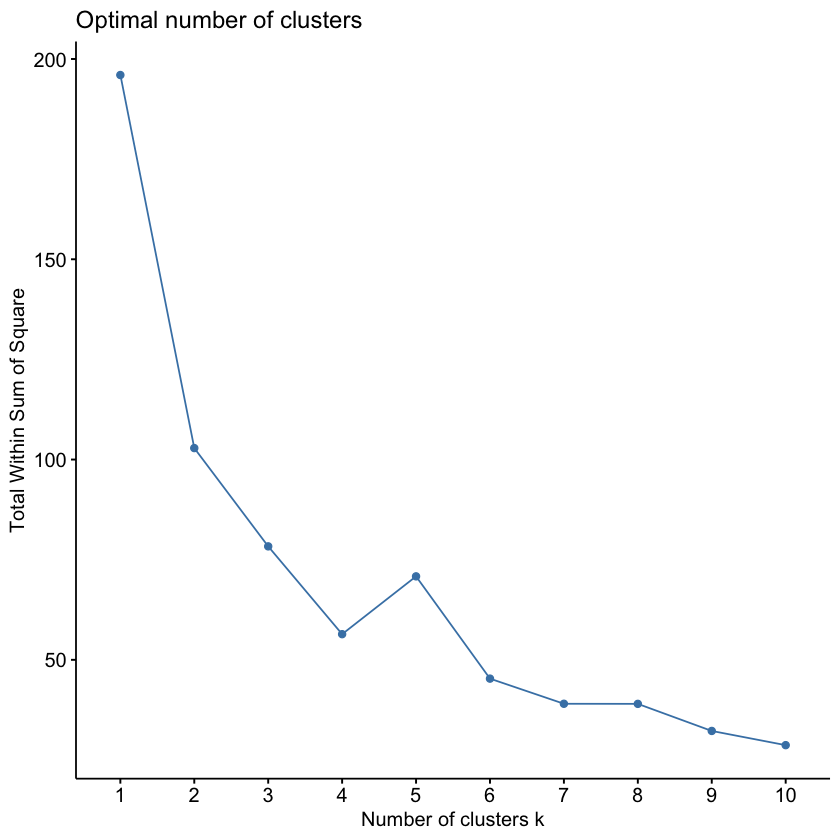

In [21]:
fviz_nbclust(df, kmeans, method = "wss")

###  <span style='color:royalblue'>  8.2. Silhouette method

    
The silhouette method determines how well each object lies within its cluster by calculating the average silhouette of observations for different values of k. A high average silhouette indicates a good clustering. The optimal number of clusters k is the one that maximizes the average silhouette over a range of possible values for k
    
In this example 2 clusters maximize the average silhouette values with 4 clusters coming in as second optimal number of clusters.

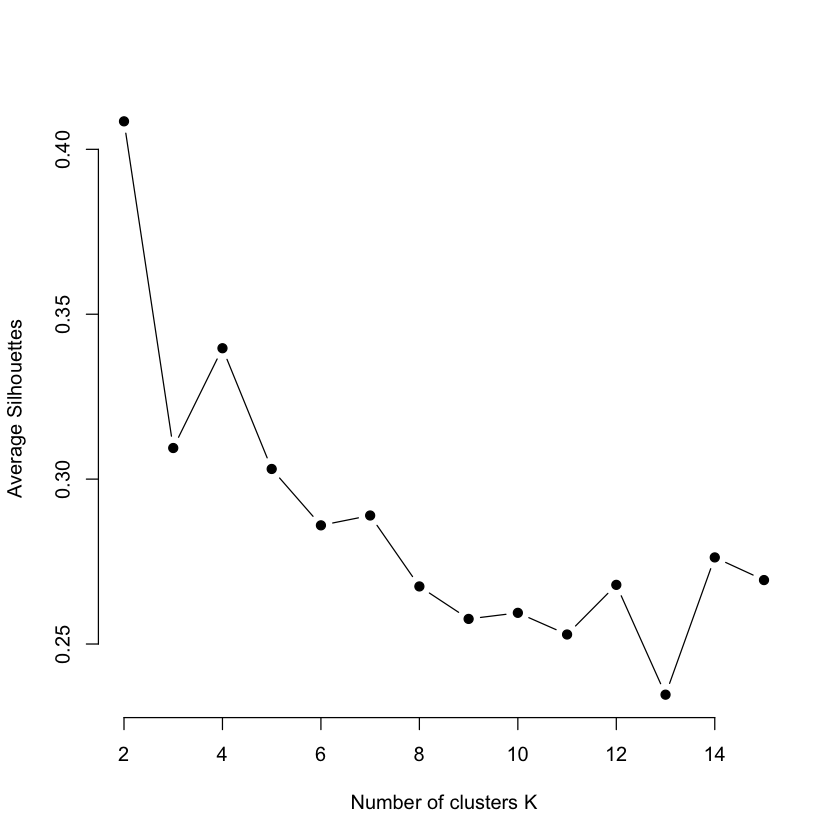

In [23]:
# function to compute average silhouette for k clusters
avg_sil <- function(k) {
  km.res <- kmeans(df, centers = k, nstart = 25)
  ss <- silhouette(km.res$cluster, dist(df))
  mean(ss[, 3])
}

# Compute and plot wss for k = 2 to k = 15
k.values <- 2:15

# extract avg silhouette for 2-15 clusters
avg_sil_values <- map_dbl(k.values, avg_sil)

plot(k.values, avg_sil_values,
       type = "b", pch = 19, frame = FALSE, 
       xlab = "Number of clusters K",
       ylab = "Average Silhouettes")

###  <span style='color:royalblue'>  8.3. Gap Statistic Method

Compares the total intracluster variation for different values of k with their expected values under null reference distribution of the data (i.e. a distribution with no obvious clustering). 
    
In this example the optimal number of clusters is 4.

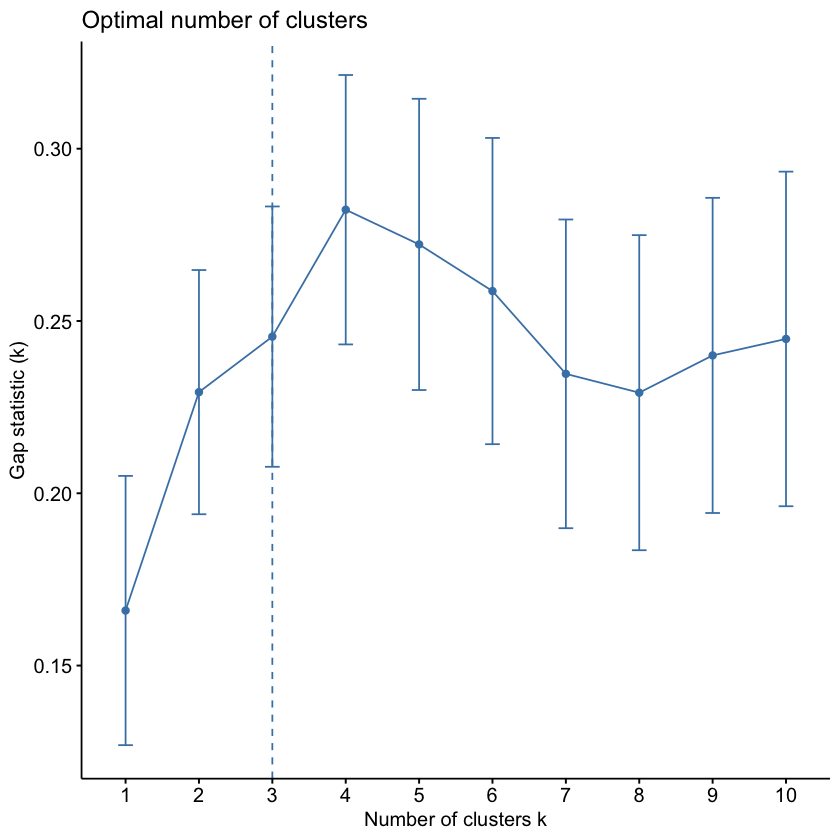

In [25]:
gap_stat <- clusGap(df, FUN = kmeans, nstart = 25,
                    K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

##  <span style='color:royalblue'>  9. Deploying final clustering with k=4

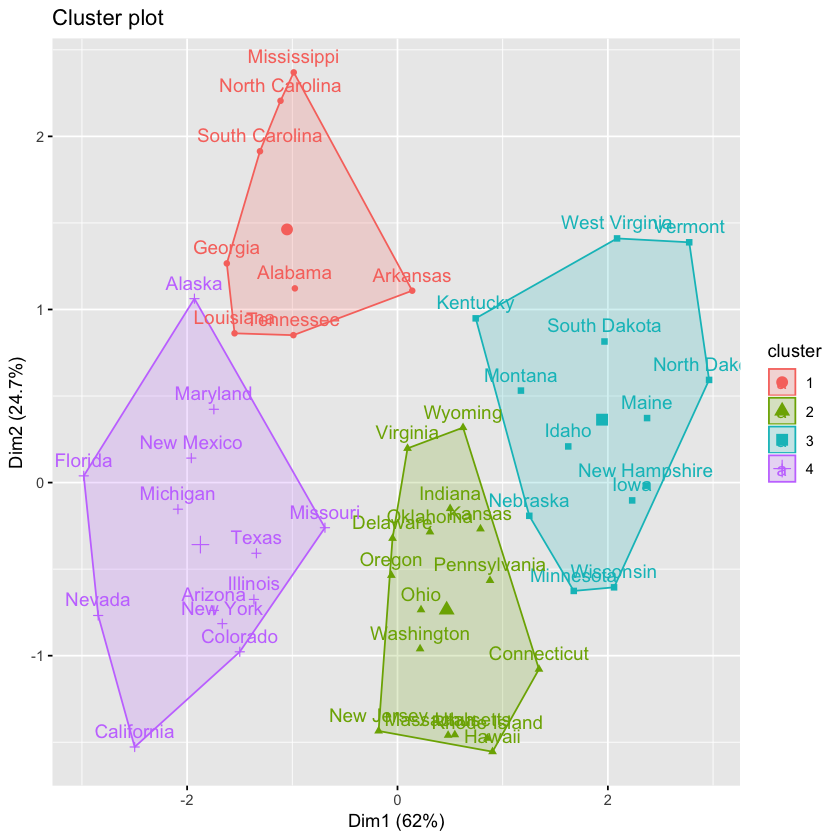

In [27]:
final <- kmeans(df, 4, nstart = 25)
fviz_cluster(final, data = df)

In [29]:
#Descriptive statistics of clusters

USArrests %>%
  mutate(Cluster = final$cluster) %>%
  group_by(Cluster) %>%
  summarise_all("mean")

Cluster,Murder,Assault,UrbanPop,Rape
1,13.93750,243.62500,53.75000,21.41250
2,5.65625,138.87500,73.87500,18.78125
3,3.60000,78.53846,52.07692,12.17692
4,10.81538,257.38462,76.00000,33.19231


**Conclusions:**
1. Clusters 1 and 3 are made up of low urban population states, however cluster 1 has a high crime rate and cluster 3 a low crime rate.

2. Clusters 2 and 4 are made up of high urban population states, however cluster 2 has a low crime rate and cluster 4 a high crime rate.

Reference: http://uc-r.github.io/kmeans_clustering